In [ ]:
!git clone https://github.com/projan-shakya/Multi-Speaker-Neural-Voice-Cloning-in-Nepali-Language.git

Cloning into 'Multi-Speaker-Neural-Voice-Cloning-in-Nepali-Language'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 69 (delta 19), reused 35 (delta 0), pack-reused 0
Receiving objects: 100% (69/69), 1.48 MiB | 6.52 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
import os
os.chdir('Multi-Speaker-Neural-Voice-Cloning-in-Nepali-Language')
!git submodule init
!git submodule update
!pip install -q unidecode tensorboardX
!pip install librosa==0.9.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.1
    Uninstalling librosa-0.10.1:
      Successfully uninstalled librosa-0.10.1


In [ ]:
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt

import IPython.display as ipd

import sys
import numpy as np
import torch

from hparams import create_hparams
from model import Tacotron2
from layers import TacotronSTFT, STFT
from audio_processing import griffin_lim
from train import load_model
from text import text_to_sequence




In [ ]:
def plot_data(data, figsize=(16, 4), titles=None, xlabel=None, ylabel=None, colorbar_labels=None):
    fig, axes = plt.subplots(1, len(data), figsize=figsize)
    for i in range(len(data)):
        im = axes[i].imshow(data[i], aspect='auto', origin='lower', interpolation='none', cmap='viridis')

        if titles:
            axes[i].set_title(titles[i])
        if xlabel:
            axes[i].set_xlabel(xlabel[i])
        if ylabel:
            axes[i].set_ylabel(ylabel[i])

        # Add color bar
        cbar = fig.colorbar(im, ax=axes[i])
        if colorbar_labels:
            cbar.set_label(colorbar_labels[i])

    plt.tight_layout()
    plt.show()

In [ ]:
hparams = create_hparams()
hparams.sampling_rate = 22050

In [ ]:
checkpoint_path = "/content/drive/MyDrive/project/Shruti_finetuned"
model = load_model(hparams)
model.load_state_dict(torch.load(checkpoint_path)['state_dict'])
_ = model.cuda().eval().half()

In [ ]:
text = "मेरो विद्यालय ऋषि मेरो विद्यालय ऋषि मेरो विद्यालय ऋषि मेरो विद्यालय ऋषि मेरो विद्यालय ऋषि मेरो विद्यालय ऋषि।"
sequence = np.array(text_to_sequence(text, ['transliteration_cleaners']))[None, :]
sequence = torch.autograd.Variable(
    torch.from_numpy(sequence)).cuda().long()

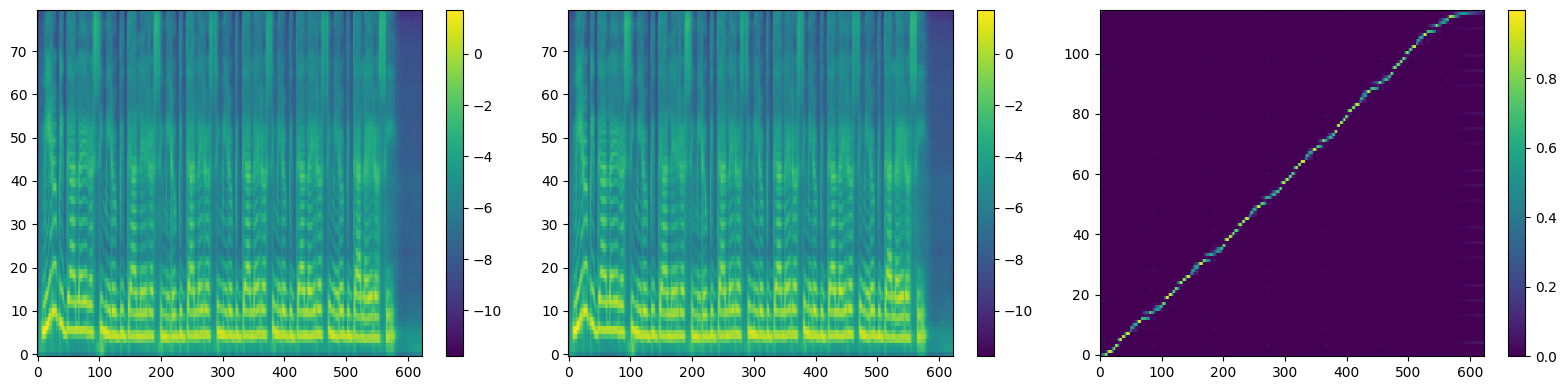

In [ ]:
mel_outputs, mel_outputs_postnet, _, alignments = model.inference(sequence)
plot_data((mel_outputs.data.cpu().numpy()[0],
           mel_outputs_postnet.data.cpu().numpy()[0],
           alignments.data.cpu().numpy()[0].T))
titles = ['Mel Spectrogram (Original)', 'Mel Spectrogram (Postnet)', 'Alignment']
xlabel = ['Time Steps', 'Time Steps', 'Decoder Time Steps']
ylabel = ['Mel Channels', 'Mel Channels', 'Encoder Time Steps']
colorbar_labels = ['Intensity', 'Intensity', 'Alignment']

In [ ]:
taco_stft = TacotronSTFT(
    hparams.filter_length, hparams.hop_length, hparams.win_length,
    sampling_rate=hparams.sampling_rate)
mel_decompress = taco_stft.spectral_de_normalize(mel_outputs_postnet)
mel_decompress = mel_decompress.transpose(1, 2).data.cpu().float()
spec_from_mel_scaling = 1000
spec_from_mel = torch.mm(mel_decompress[0], taco_stft.mel_basis)
spec_from_mel = spec_from_mel.transpose(0, 1).unsqueeze(0)
spec_from_mel = spec_from_mel * spec_from_mel_scaling

In [ ]:
waveform = griffin_lim(torch.autograd.Variable(spec_from_mel[:, :, :-1]),
                       taco_stft.stft_fn, 60)

In [ ]:
ipd.Audio(waveform[0].data.cpu().numpy(), rate=hparams.sampling_rate)

In [ ]:
!git clone https://gitlab.com/shrutiaudio/shrutiaudio.git

Cloning into 'shrutiaudio'...
remote: Enumerating objects: 309, done.
remote: Counting objects: 100% (309/309), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 309 (delta 78), reused 302 (delta 75), pack-reused 0
Receiving objects: 100% (309/309), 766.71 MiB | 33.00 MiB/s, done.
Resolving deltas: 100% (78/78), done.
Updating files: 100% (186/186), done.


In [ ]:
%run /content/Multi-Speaker-Neural-Voice-Cloning-in-Nepali-Language/shrutiaudio/tacotron2/hifi-gan/inference_e2e.py

Initializing Inference Process..


usage: inference_e2e.py [-h] [--input_mels_dir INPUT_MELS_DIR] [--output_dir OUTPUT_DIR]
                        --checkpoint_file CHECKPOINT_FILE
inference_e2e.py: error: the following arguments are required: --checkpoint_file


SystemExit: 2